## SVM

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
from sklearn.svm import SVC

### Credit data

In [3]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [4]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [5]:
svm_credit = SVC(kernel='linear', random_state=1,
                 C = 1.0) #c is the punishment parameter
svm_credit.fit(x_credit_training,y_credit_training)

SVC(kernel='linear', random_state=1)

In [6]:
prediction = svm_credit.predict(x_credit_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [7]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test,prediction)

0.946

Testing another parameter

In [11]:
svm_credit = SVC(kernel='poly', random_state=1,
                 C = 1.0) #c is the punishment parameter
svm_credit.fit(x_credit_training,y_credit_training)
prediction = svm_credit.predict(x_credit_test)
accuracy_score(y_credit_test,prediction)

0.968

In [12]:
svm_credit = SVC(kernel='sigmoid', random_state=1,
                 C = 1.0) #c is the punishment parameter
svm_credit.fit(x_credit_training,y_credit_training)
prediction = svm_credit.predict(x_credit_test)
accuracy_score(y_credit_test,prediction)

0.838

In [13]:
svm_credit = SVC(kernel='rbf', random_state=1,
                 C = 1.0) #c is the punishment parameter
svm_credit.fit(x_credit_training,y_credit_training)
prediction = svm_credit.predict(x_credit_test)
accuracy_score(y_credit_test,prediction)

0.982

Best kernel was "rbf".

Now trying changes of $c$.

In [14]:
svm_credit = SVC(kernel='rbf', random_state=1,
                 C = 2.0) #c is the punishment parameter
svm_credit.fit(x_credit_training,y_credit_training)
prediction = svm_credit.predict(x_credit_test)
accuracy_score(y_credit_test,prediction)

0.988

Result: kernel rbf  and c=2

0.988

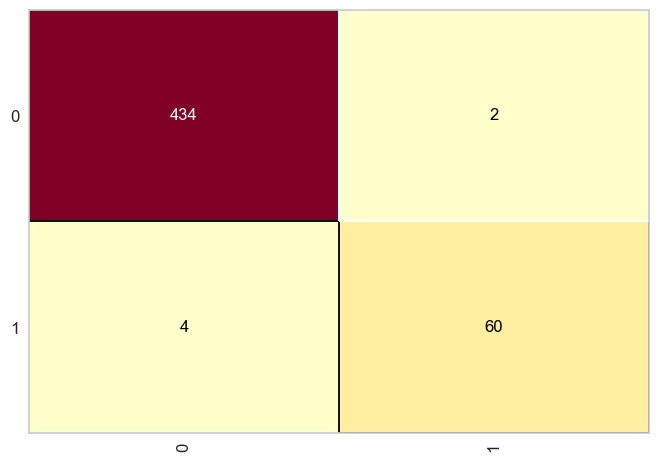

In [15]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(svm_credit)
confusion_matrix.fit(x_credit_training,y_credit_training)
confusion_matrix.score(x_credit_test,y_credit_test)

In [16]:
print(classification_report(y_credit_test,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Census data

In [17]:
with open('census.pkl', 'rb') as f:
    x_census_training, y_census_training, x_census_test, y_census_test = pickle.load(f)

In [18]:
x_census_training.shape, y_census_training.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [19]:
svm_census = SVC(kernel='linear', random_state=1,
                 C = 1.0) #c is the punishment parameter
svm_census.fit(x_census_training,y_census_training)
prediction = svm_census.predict(x_census_test)
accuracy_score(y_census_test,prediction)

0.8507676560900717

0.8507676560900717

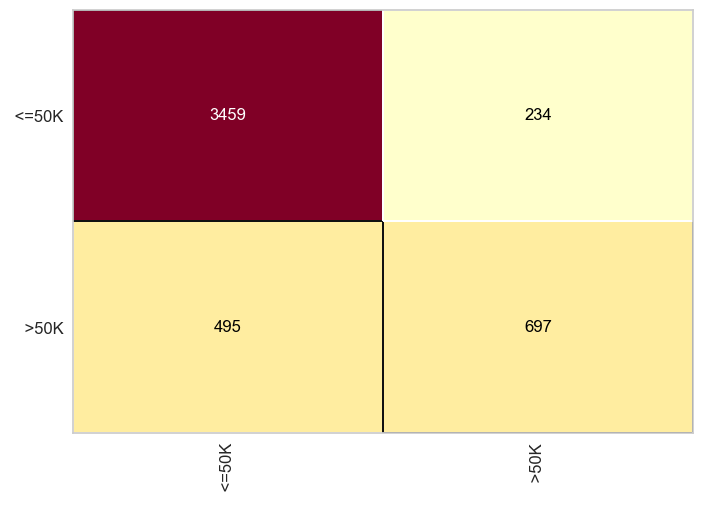

In [20]:
confusion_matrix = ConfusionMatrix(svm_census)
confusion_matrix.fit(x_census_training,y_census_training)
confusion_matrix.score(x_census_test,y_census_test)

In [21]:
print(classification_report(y_census_test,prediction))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

